In [12]:
import sqlite3 as sql

import numpy as np
import pandas as pd
from pandas import cut, read_sql
import pickle as pkl
from random import choices
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.optimize as optimize

indir_Burn_inference = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_stop_track_muon/Inference/pid_40_days_sample_first.csv"
Leon_validation_inference = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_stop_track_muon/trained_models/last_one_lvl3MC/dynedge_pid_last_one_lvl3MC_SplitInIcePulses_21.5_mill_equal_frac/results.csv"
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_stop_track_muon/plotting/Presentation_plots/"
indir_RD_selection = "/groups/icecube/peter/workspace/analyses/multi_classification_on_stop_and_track_muons/plotting/Comparison_RD_MC/dev_lvl3_genie_burnsample_RD_event_numbers.csv"
indir_MC_selection = "/groups/icecube/peter/workspace/analyses/multi_classification_on_stop_and_track_muons/plotting/Comparison_RD_MC/dev_lvl3_genie_burnsample_MC_event_numbers.csv"

results_inference = pd.read_csv(indir_Burn_inference)
results_Leon_inference = pd.read_csv(Leon_validation_inference)
RD_selection = pd.read_csv(indir_RD_selection)
MC_selection = pd.read_csv(indir_MC_selection)

results_MC = results_inference[results_inference['event_no'].isin(MC_selection['event_no'].values)]
results_RD = results_inference[results_inference['event_no'].isin(RD_selection['event_no'].values)]

In [23]:
print(results_MC.head(5))
font = {
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)

       Unnamed: 0  pid_noise_pred  pid_muon_pred  pid_neutrino_pred   pid  \
50396       50396    2.480150e-12   6.040555e-08           1.000000 -14.0   
50397       50397    2.375071e-05   6.736321e-04           0.999303  14.0   
50398       50398    3.667555e-01   4.739934e-04           0.632770  14.0   
50399       50399    9.537474e-04   1.771058e-05           0.999029 -14.0   
50400       50400    1.067307e-01   8.539584e-04           0.892415 -14.0   

       event_no  
50396   50396.0  
50397   50397.0  
50398   50398.0  
50399   50399.0  
50400   50400.0  


In [90]:

bins_to_use = np.linspace(0,1,101)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2

fig, axs = plt.subplots(1,1,sharex=False,figsize=(20, 10))

counts_RD, _,_ = axs.hist(results_RD['pid_neutrino_pred'].values,bins=bins_to_use,label='RD')
print(np.sum(counts_RD))
axs.set_ylabel('Count')

axs.set_yscale('log')

axs.set_xlabel('Neutrino probability')

axs.set_title('Burn Sample Real Data')

fig.tight_layout()

fig.savefig(outdir + 'Burn_Sample_RD_Neutrino_prob_histogram.png')



fig, axs = plt.subplots(1,1,sharex=False,figsize=(20, 10))

counts_RD, _,_ = axs.hist(results_RD['pid_muon_pred'].values,bins=bins_to_use,label='RD')
print(np.sum(counts_RD))
axs.set_ylabel('Count')

axs.set_yscale('log')

axs.set_xlabel('Muon probability')

axs.set_title('Burn Sample Real Data')

fig.tight_layout()

fig.savefig(outdir + 'Burn_Sample_RD_Muon_prob_histogram.png')


fig, axs = plt.subplots(1,1,sharex=False,figsize=(20, 10))

counts_RD, _,_ = axs.hist(results_RD['pid_noise_pred'].values,bins=bins_to_use,label='RD')
print(np.sum(counts_RD))
axs.set_ylabel('Count')

axs.set_yscale('log')

axs.set_xlabel('Noise probability')

axs.set_title('Burn Sample Real Data')

fig.tight_layout()

fig.savefig(outdir + 'Burn_Sample_RD_Noise_prob_histogram.png')

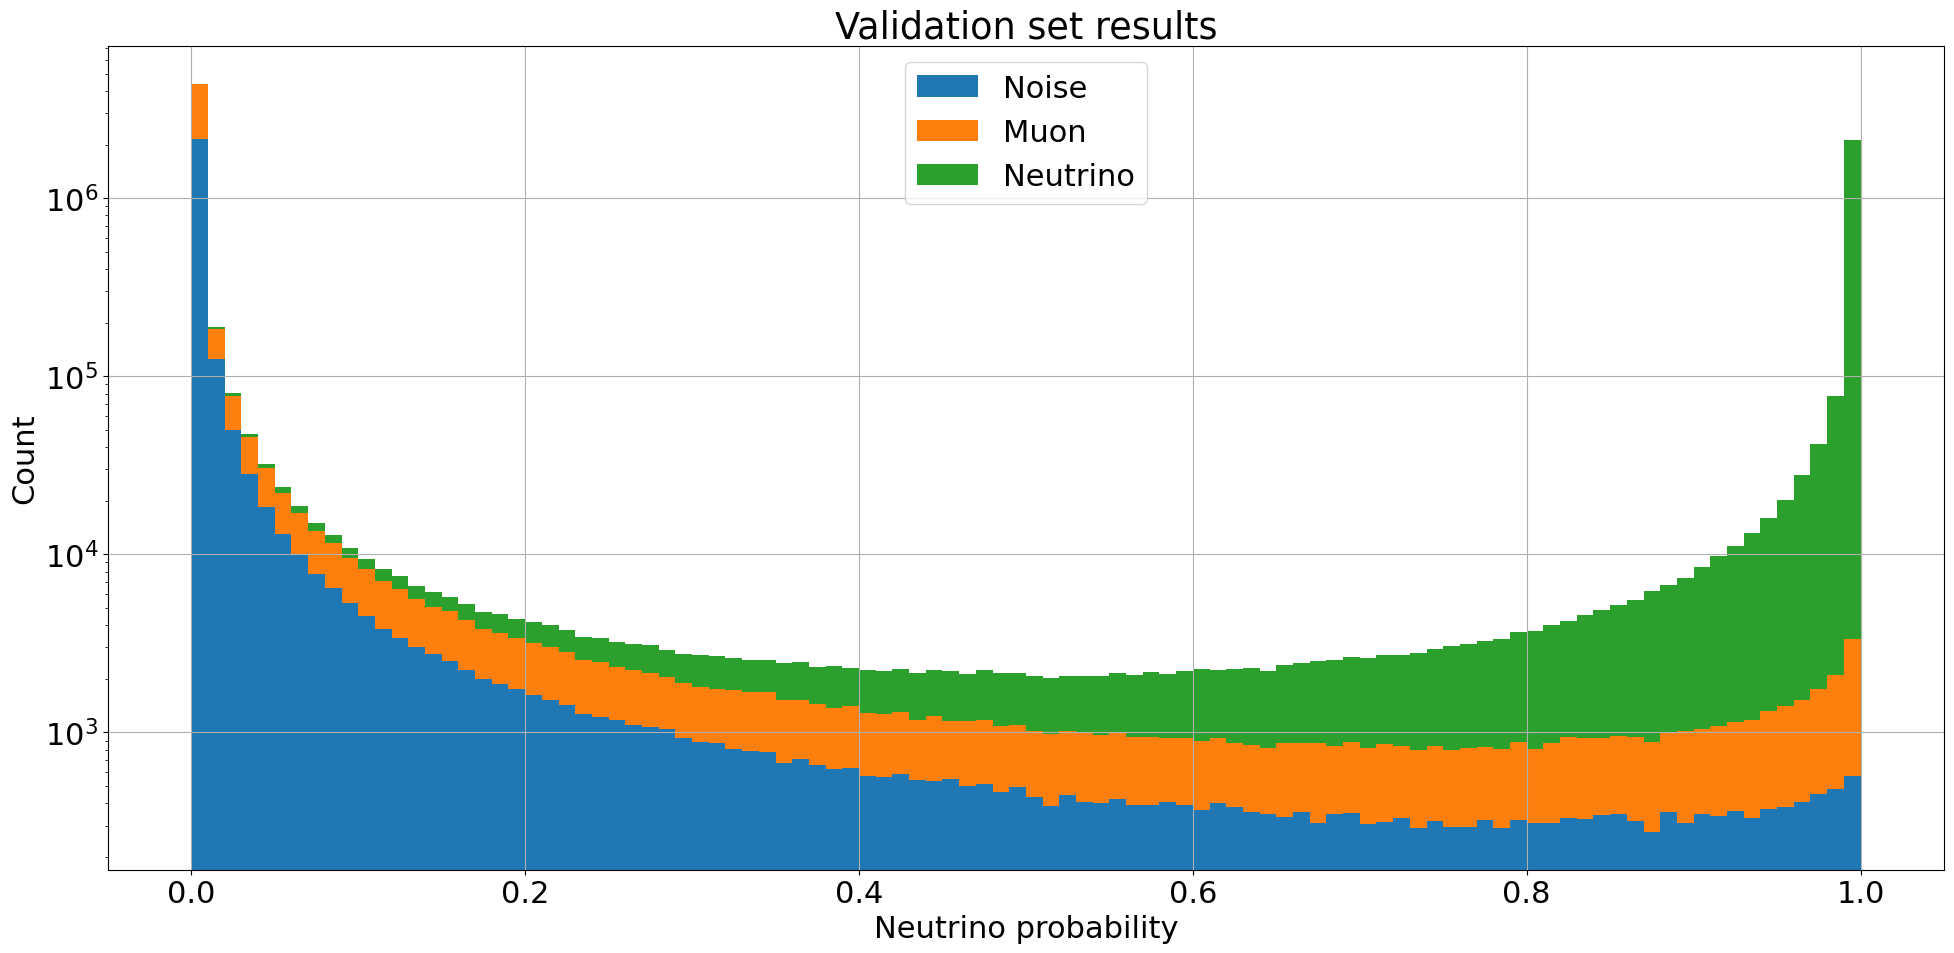

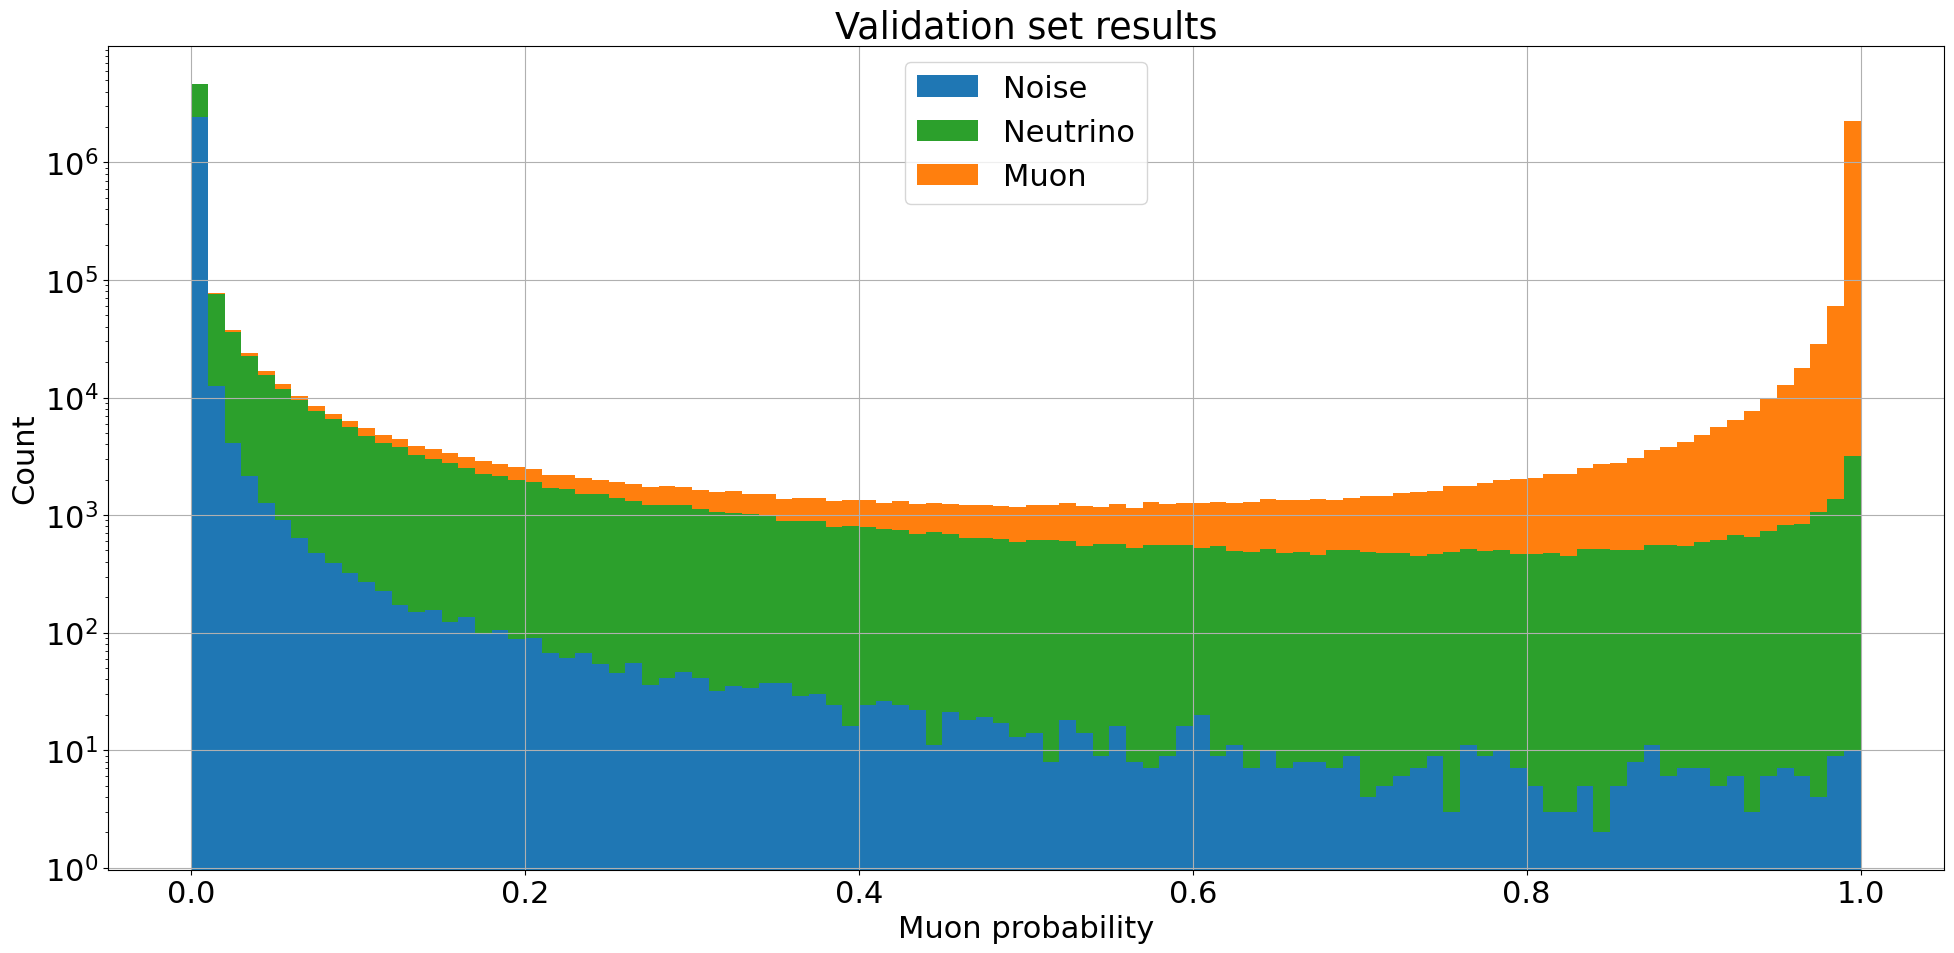

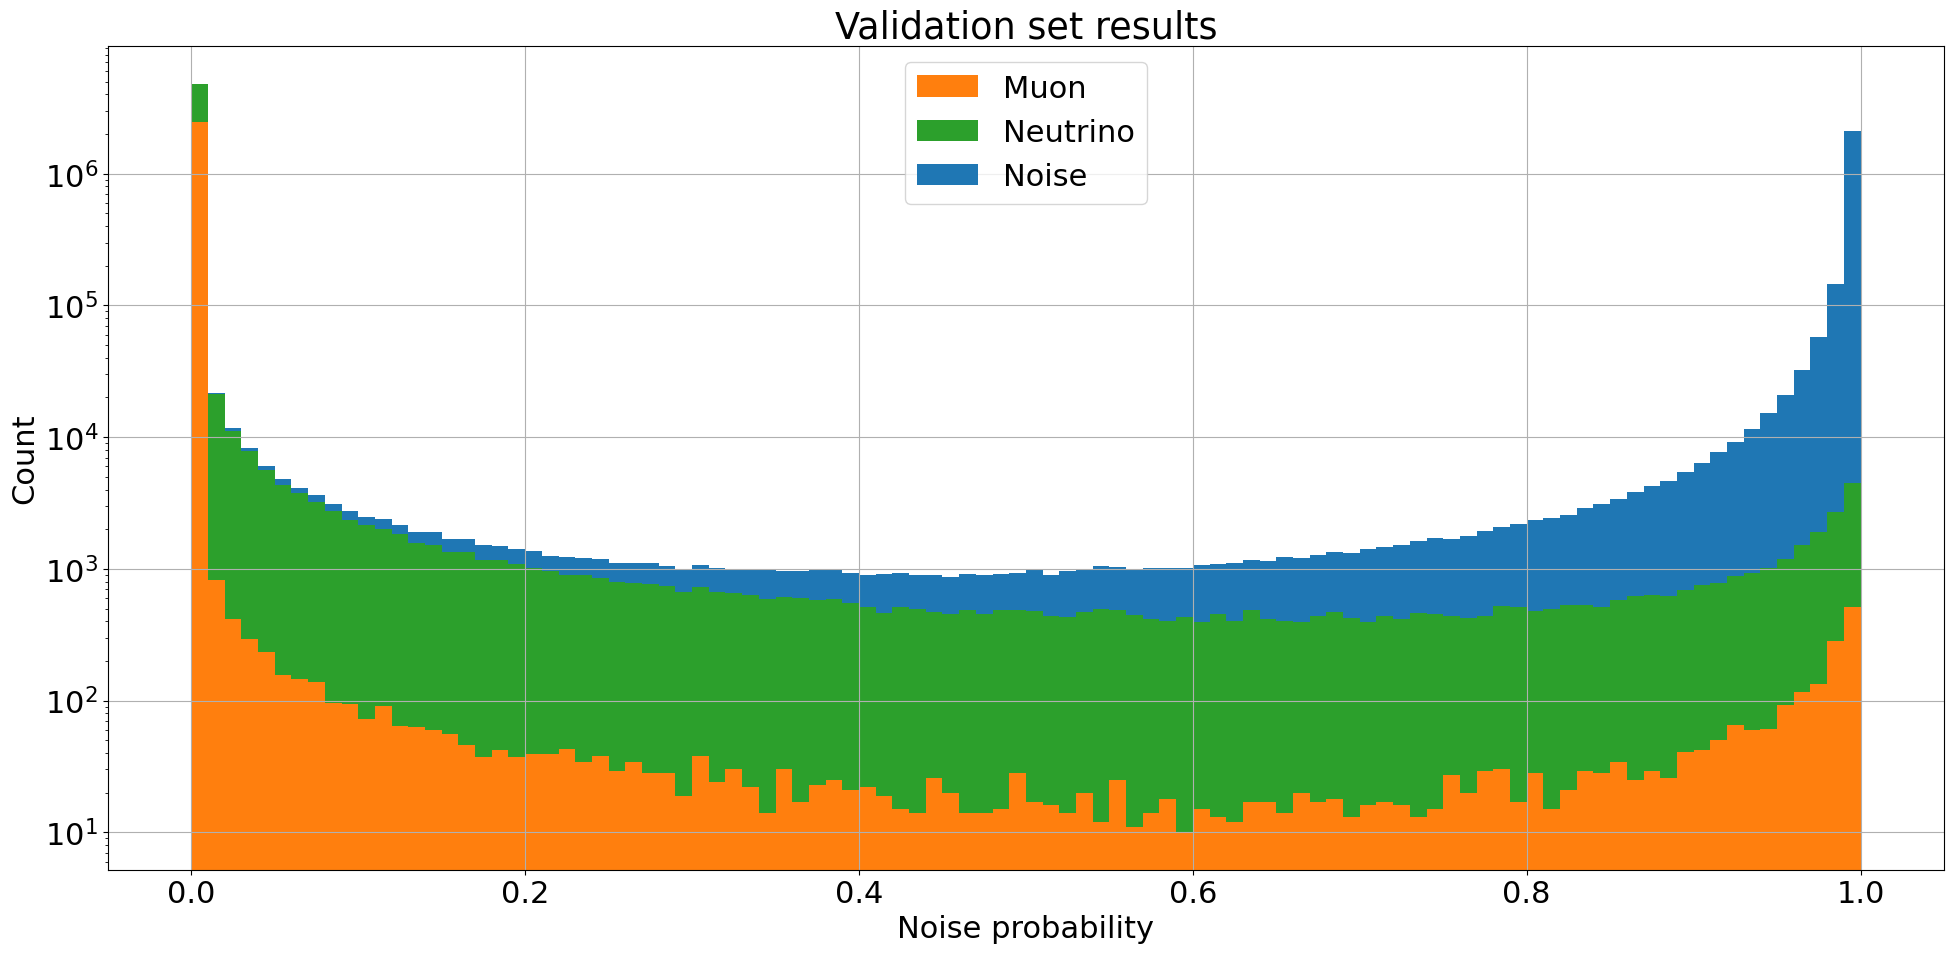

In [89]:
noise_mask = results_Leon_inference['pid'].isin([-1,1])
muon_mask = results_Leon_inference['pid'].isin([-13,13])
neutrino_mask = results_Leon_inference['pid'].isin([-12,12,-14,14,-16,16])

fig, axs = plt.subplots(figsize=(20, 10))
plot_neutrino = [results_Leon_inference['pid_neutrino_pred'][noise_mask],results_Leon_inference['pid_neutrino_pred'][muon_mask],results_Leon_inference['pid_neutrino_pred'][neutrino_mask]]
axs.hist(plot_neutrino, bins_to_use, density=False, histtype='bar',stacked=True,label=['Noise','Muon','Neutrino'],color=['C0','C1','C2'])

axs.set_title('Validation set results')
axs.set_xlabel('Neutrino probability')
axs.set_ylabel('Count')
axs.set_yscale('log')
axs.legend()
axs.grid()
#axs.set_ylim(bottom=1)

fig.tight_layout()

fig.savefig(outdir + 'Leon_val_set_Neutrino_prob_histogram.png')


fig, axs = plt.subplots(figsize=(20, 10))
plot_neutrino = [results_Leon_inference['pid_muon_pred'][noise_mask],results_Leon_inference['pid_muon_pred'][neutrino_mask],results_Leon_inference['pid_muon_pred'][muon_mask]]
axs.hist(plot_neutrino, bins_to_use, density=False, histtype='bar',stacked=True,label=['Noise','Neutrino','Muon'],color=['C0','C2','C1'])

axs.set_title('Validation set results')
axs.set_xlabel('Muon probability')
axs.set_ylabel('Count')
axs.set_yscale('log')
axs.legend()
#axs.set_ylim(bottom=1)
axs.grid()
fig.tight_layout()

fig.savefig(outdir + 'Leon_val_set_Muon_prob_histogram.png')


fig, axs = plt.subplots(figsize=(20, 10))
plot_neutrino = [results_Leon_inference['pid_noise_pred'][muon_mask],results_Leon_inference['pid_noise_pred'][neutrino_mask],results_Leon_inference['pid_noise_pred'][noise_mask]]
axs.hist(plot_neutrino, bins_to_use, density=False, histtype='bar',stacked=True,label=['Muon','Neutrino','Noise'],color=['C1','C2','C0'])

axs.set_title('Validation set results')
axs.set_xlabel('Noise probability')
axs.set_ylabel('Count')
axs.set_yscale('log')
axs.legend()
axs.grid()
#axs.set_ylim(bottom=1)

fig.tight_layout()

fig.savefig(outdir + 'Leon_val_set_Noise_prob_histogram.png')

In [56]:
np.sum(neutrino_mask)

0

,Unnamed: 0,pid_noise_pred,pid_muon_pred,pid_neutrino_pred,pid,event_no
0,0,1.000000e+00,0.000000,0.000000,-1.0,23434375.0
1,1,3.521854e-18,0.999765,0.000235,13.0,70953235.0
2,2,7.669151e-16,0.998584,0.001416,13.0,97961265.0
3,3,9.920183e-02,0.015858,0.884940,12.0,33636682.0
4,4,4.190055e-04,0.004481,0.995101,12.0,53035643.0
...,...,...,...,...,...,...
7424995,7424995,1.000000e+00,0.000000,0.000000,-1.0,66993636.0
7424996,7424996,6.057148e-15,0.999653,0.000347,13.0,58567439.0
7424997,7424997,3.149664e-02,0.000056,0.968447,16.0,81515634.0
7424998,7424998,2.115022e-04,0.041109,0.958680,16.0,221130.0
